<a href="https://colab.research.google.com/github/krnvz/Tutoriales/blob/main/Tendencias_de_b%C3%BAsqueda_en_Google_utilizando_PyTrends_en%C2%A0Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tendencias de búsqueda en Google utilizando PyTrends en Python


Comencemos por instalar el paquete e importar el método TrendReq desde el módulo de request de PyTrends. Además, importemos las bibliotecas Pandas y Matplotlib para almacenar y visualizar los datos.

In [1]:
# Instalación del paquete 
%%capture 
!pip install pytrends

# Importar las librerías necesarias para almacenar y visualizar los datos
import pandas as pd        
import matplotlib.pyplot as plt
from pytrends.request import TrendReq              


Ahora podemos establecer una conexión con Google. Existen varias opciones para ajustar [los parámetros de conexión](https://pypi.org/project/pytrends/#api), pero por ahora utilizaremos el código de abajo:

Donde destacan 2 parámetros principales:
* ` hl u hosting language`: es el lenguaje que se utilizará para acceder a Google Trends (se pueden obtener los demás idiomas combinando los c[ódigos de idiomas](https://omegat.sourceforge.io/manual-standard/es/appendix.languages.html), con los [códigos de país](https://www.datosmundial.com/codigos-de-pais.php))
* `tz o time zone`: la zona horaria en minutos que se usará como referencia ( [aquí](https://forbrains.co.uk/international_tools/earth_timezones?ref=hackernoon.com) podemos encontrar los valores para otras zonas horarias)

In [2]:
# Crear conexión a Goiogle Trendsg
pytrend = TrendReq(hl = 'es-CL', tz = 180)


#### **Generar carga útil**

Una vez que tenemos la conexión en funcionamiento, procedemos a generar una consulta con las palabras que deseamos buscar en Google Trends (máximo 5), con el método `pytrend.build_payload()`.

Parámetros:
* `kw_list` = [ ]  → lista de keywords para buscar, con máximo 5 kw.
* `cat` =  → Categoria para restringir la búsqueda [(categorias disponibles)](https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)
* `timeframe` = " " → Fecha de inicio (predeterminado: 'today 5-y', todo: 'all', fecha especificia: '2016-12-14 2017-01-25')
* `geo` = ""  → [abreviatura de dos letras del pais](https://laendercode.net/es/2-letter-list.html) ej_'CL' para Chile
* `gprop` = " "   a que propiedad de Google filtrar ('images', 'news', 'youtube' o 'froogle' para Google Sghopping)
* `tz` = " "  → desplazamiento de [zona horaria](https://forbrains.co.uk/international_tools/earth_timezones?ref=hackernoon.com) en minutos.

In [4]:
# Definir la o las parabras de interés
kw_list = ['pedidosya', 'rappi', 'uber eats', 'glovo']

# Generar una consulta para la geolocalización deseada
pytrend.build_payload(kw_list= kw_list, geo = 'CL')



Con la consulta creada, podemos comenzar a extraer información útil empleando alguno de los siguientes métodos de Pytrends.

#### **MÉTODOS DISPONIBLES**
Están disponibles los siguientes métodos:

* **Interés a lo largo del tiempo:** devuelve datos históricos indexados sobre cuándo se buscó más la palabra clave, como se muestra en la sección Interés a lo largo del tiempo de Google Trends.
`pytrend.interest_over_time()`
  * Parametros: 
    * Sin parametros

* **Interés histórico por hora:** devuelve datos históricos, indexados y por hora de cuándo se buscó más la palabra clave, como se muestra en la sección Interés a lo largo del tiempo de Google Trends. Envía múltiples solicitudes a Google, cada una de las cuales recupera una semana de datos por hora. Parece que esta sería la única forma de obtener datos históricos por horas.
`pytrend.get_historical_interest()`
  * Parametros: 
    * `kw_list`: lista de key words 
    * `year_start, month_start, day_start, hour_start, year_end, month_end, day_end, hour_end`: Detalles temporales (predeterminado: inicio el 01-01-2018 y fin )

* **Interés por región:** devuelve datos sobre dónde se busca más la palabra clave, como se muestra en la sección Interés por región de Google 
`Trends.pytrend.interest_by_region()`
  * Parametros: 
    * `resolution`: Devuelve datos a nivel de 'CITY', 'COUNTRY', 'DMA' Y 'REGION'
    * `inc_low_vol`: True / False (también incluye datos de tendencias de Google para países / regiones de bajo volumen)
    * `inc_geo_code`: True / False (incluye códigos ISO de países junto con los nombres en los datos)

* **Temas relacionados:** devuelve datos para las palabras clave relacionadas con una palabra clave proporcionada que se muestra en la sección Temas relacionados de Google Trends. 
`pytrend.related_topics()`
  * Parametros: 
    * Sin parametros

* **Consultas relacionadas:** devuelve datos para las palabras clave relacionadas con una palabra clave proporcionada que se muestra en la sección Consultas relacionadas de Google Trends.
`pytrend.related_queries()`
  * Parametros: 
    * Sin parametros

* **Tendencias de búsquedas:** devuelve datos de las últimas búsquedas de tendencias que se muestran en la sección Tendencias de búsquedas de Google Trends. (tendencias de búsqueda en tiempo real para el país especificado)
`pytrend.trending_searches(pn='united_states')`
  * Parametros: 
    * `np`: Pais en el cual se quiere consultar (codigos de paises)
* **Gráficos principales:** devuelve los datos de un tema determinado que se muestran en la sección Gráficos principales de Google Trends.
`pytrend.top_charts()`
  * Parametros: 
    * `date`: YYYY o YYYYMM, ej: 201912 - diciembre de 2019
* **Sugerencias:** devuelve una lista de palabras clave sugeridas adicionales que se pueden usar para refinar una búsqueda de tendencias.
`pytrend.suggestions(keyword)`
  * Parametros: 
    * `keyword`: palabra clave para obtener la sugerencia

Recuerda que la explicación de que significan especificamente los valores entregados por la APi, estan [aquí](https://)  ESCRIBIR EL LINK 

#### **Interés a lo largo del tiempo**
Usando el método `pytrend.interest_over_time()` obtendremos datos históricos indexados sobre cuándo se buscó más la palabra clave, sin necesidad de especificar ningún parámetro.

In [5]:
# Extracción de datos relacionados con el interés a lo largo del tiempo de las palabras consultadas
over_time = pytrend.interest_over_time().drop('isPartial', axis = 1)
over_time.head()

,pedidosya,rappi,uber eats,glovo
date,,,,
2017-05-21,4,0,0,1
2017-05-28,2,0,0,0
2017-06-04,7,0,0,0
2017-06-11,5,0,0,0
2017-06-18,2,0,0,0


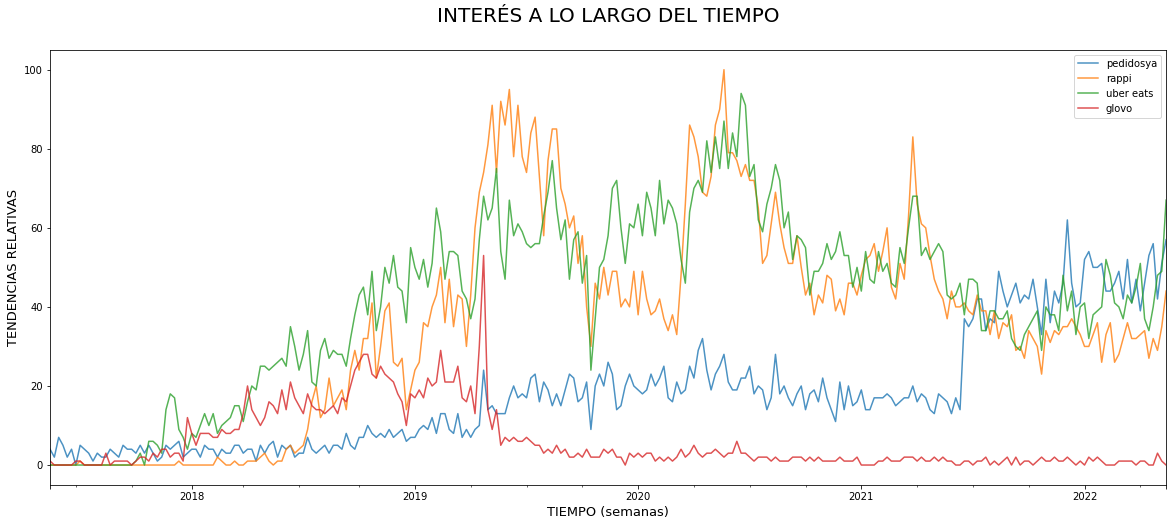

In [6]:
# Apoyo formato gráficas
size_title = 20
size_label = 13
size_plot = (20, 8)

# Visualización de las tendencias 
over_time.plot(figsize = size_plot, alpha = 0.8)
plt.title('INTERÉS A LO LARGO DEL TIEMPO\n', fontsize = size_title)
plt.xlabel('TIEMPO (semanas)', fontsize = size_label)
plt.ylabel('TENDENCIAS RELATIVAS', fontsize = size_label)
plt.show()


#### **Interés histórico por hora**

En caso de que la granularidad del método anterior no sea suficiente, podemos obtener datos históricos por hora, para las keywords de importancia. En este caso utilizaremos `pytrend.get_historical_interest()`

In [7]:
# historico por horas para 'pedidosya' para el 2020-2021

kw_list = ['pedidosya']

hist_20_21 = pytrend.get_historical_interest(kw_list, year_start=2020, 
                                      month_start=1, day_start=1, hour_start=0, 
                                      year_end=2021,month_end=12, day_end=31,
                                      hour_end=23, cat=0, geo='CL', gprop='', 
                                      sleep=0).drop('isPartial', axis = 1)
hist_20_21.tail()

,pedidosya,isPartial
date,,
2021-12-31 19:00:00,0,False
2021-12-31 20:00:00,0,False
2021-12-31 21:00:00,21,False
2021-12-31 22:00:00,0,False
2021-12-31 23:00:00,0,False


Con la ayuda un poco de código, podemos agregar algunas columnas que nos faciliten el análisis y las visualizaciones. Especificamente, detalles de las horas del día, días del mes y de la semana.

In [8]:
# Agregar información adicional: horas del día, días del mes y de la semana
hist_20_21['horas'] = hist_20_21.index.hour
hist_20_21['dia'] = hist_20_21.index.day
hist_20_21['dia_semana'] = hist_20_21.reset_index().date.dt.dayofweek.values # Día de la semana con lunes=0 y domingo=6.
hist_20_21.head()       

,pedidosya,isPartial,horas,dia,dia_semana
date,,,,,
2020-01-01 00:00:00,0,False,0,1,2
2020-01-01 01:00:00,41,False,1,1,2
2020-01-01 02:00:00,0,False,2,1,2
2020-01-01 03:00:00,0,False,3,1,2
2020-01-01 04:00:00,0,False,4,1,2


In [9]:
# Tendencia media por hora
df_day = hist_20_21.groupby('dia').mean()[['pedidosya']]
# Tendencia media por día del mes
df_hour = hist_20_21.groupby('horas').mean()[['pedidosya']]
# Tendencia media por dia de la semana
df_day_week = hist_20_21.drop([ 'horas'], axis = 1).groupby('dia_semana').mean()[['pedidosya']]
# Tendencia media por hora para los días sabados
hour_saturday = hist_20_21.query('dia_semana == 5').groupby('horas').mean()[['pedidosya']]


Al apoyarnos en una visualización, podemos entender de mejor forma el comportamiento de búsqueda de los chilenos, con  relación a la keyword de interés: pedidosya, para los años 2020 y 2021.

Al prestar atención al comportamiento a lo largo del mes (gráfico superior derecho), resalta el hecho de que las búsquedas se intensifican a principios y fines de mes. ¿Esto se podría relacionar con las fechas habituales en las que los chilenos reciben sus sueldos?

Además podriamos notas (para el período en cuestión) que en los días sabados, se concentran las frecuencias relativas de busquedas (gráfico inferior izquiedo). Puntualmente a las 1:00 hrs (en la madrugada) y apartir de las 16:00 hrs en adelante (gráfico inferior derecho).

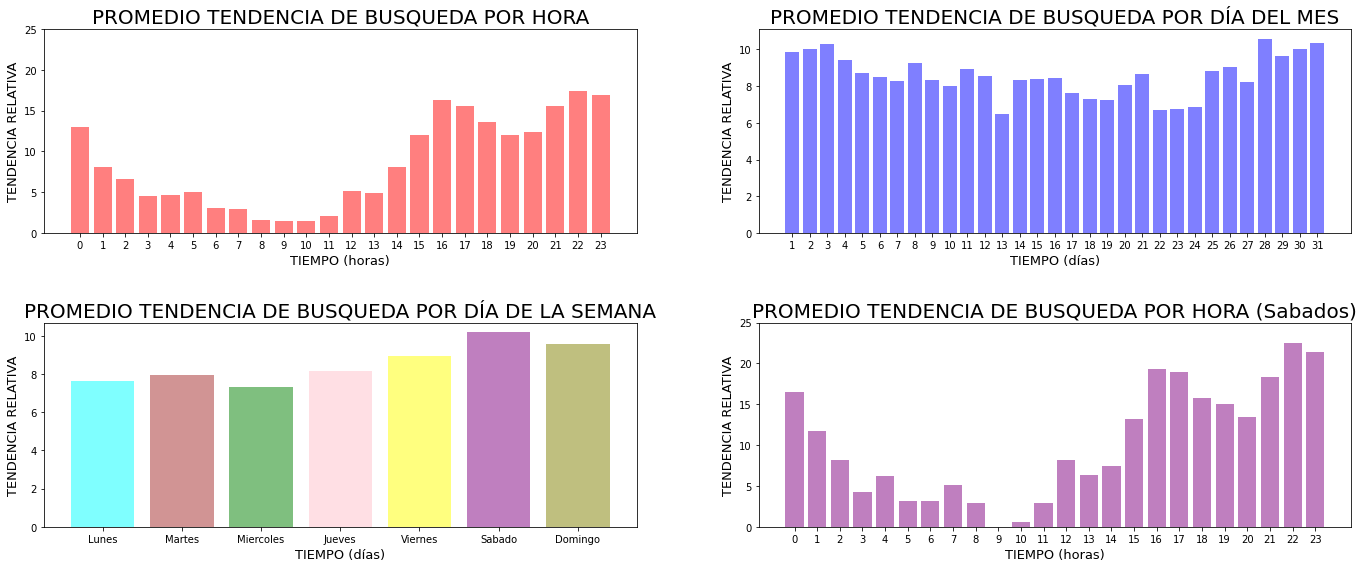

In [11]:
# por hora
x1 = df_hour.index
y1 = df_hour.pedidosya

# dia del mes 
x2 = df_day.index
y2 = df_day.pedidosya

# por dia de la semana 
x3 = df_day_week.index
y3 = df_day_week.pedidosya

# por hora para los días sabados
x4 = hour_saturday.index
y4 = hour_saturday.pedidosya

 
fig = plt.figure(figsize = size_plot)
fig.clf()
ax = fig.subplots(2,2)
 
ax[0,0].bar(x1, y1, color = 'red', alpha = 0.5)
ax[0,0].set_xlabel('TIEMPO (horas)', fontsize = size_label)
ax[0,0].set_ylabel('TENDENCIA RELATIVA', fontsize = size_label)
ax[0,0].set_title('PROMEDIO TENDENCIA DE BUSQUEDA POR HORA', fontsize = size_title)
ax[0,0].set_xticks([x for x in range(24)])
ax[0,0].set_yticks([x for x in range(0, 30, 5)])

ax[0,1].bar(x2, y2, color = 'blue', alpha = 0.5)
ax[0,1].set_xlabel('TIEMPO (días)', fontsize = size_label)
ax[0,1].set_ylabel('TENDENCIA RELATIVA', fontsize = size_label)
ax[0,1].set_title('PROMEDIO TENDENCIA DE BUSQUEDA POR DÍA DEL MES', fontsize = size_title)
ax[0,1].set_xticks([x for x in range(1, 32)])
 
ax[1,0].bar(x3, y3, color=['cyan','brown','green','pink','yellow', 'purple', 'olive'], alpha = 0.5)
ax[1,0].set_xlabel('TIEMPO (días)', fontsize = size_label)
ax[1,0].set_ylabel('TENDENCIA RELATIVA', fontsize = size_label)
ax[1,0].set_title('\nPROMEDIO TENDENCIA DE BUSQUEDA POR DÍA DE LA SEMANA', fontsize = size_title)
ax[1,0].set_xticklabels(['','Lunes', 'Martes', 'Miercoles', 'Jueves','Viernes', 'Sabado', 'Domingo'])

ax[1,1].bar(x4, y4, color = 'purple', alpha = 0.5)
ax[1,1].set_xlabel('TIEMPO (horas)', fontsize = size_label)
ax[1,1].set_ylabel('TENDENCIA RELATIVA', fontsize = size_label)
ax[1,1].set_title('\nPROMEDIO TENDENCIA DE BUSQUEDA POR HORA (Sabados)', fontsize = size_title)
ax[1,1].set_xticks([x for x in range(24)])
ax[1,1].set_yticks([x for x in range(0, 30, 5)])
fig.tight_layout()
fig.show()  

#### **Interés por región**

Tambien tenemos la opción de analizar el lugar donde se busca más la palabra clave, de acuerdo a regiones geográficas de interés. Utilizando  `pytrend.interest_by_region()`.

In [16]:
# Interés por región de Chile.
# Interest by Region, ordenado de mayor a menor
df = pytrend.interest_by_region().sort_values('pedidosya', ascending = False)

df.head()

,pedidosya
geoName,
Región de los Ríos,100
Región de Antofagasta,58
Región de Coquimbo,33
Región Metropolitana,30
Región de Magallanes y de la Antártica Chilena,30


De esta forma podemos observar, que la región líder en búsquedas relativas para los últimos 5 años  (parámetro por defecto para timeframe) es  La Región de los Ríos y en su contraparte se encuentra la Región de Aysén del General Carlos Ibáñez del Campo (XI Región).

* *Nota: las regiones pueden variar de acuerdo al momento en el que se ejecute el código.*

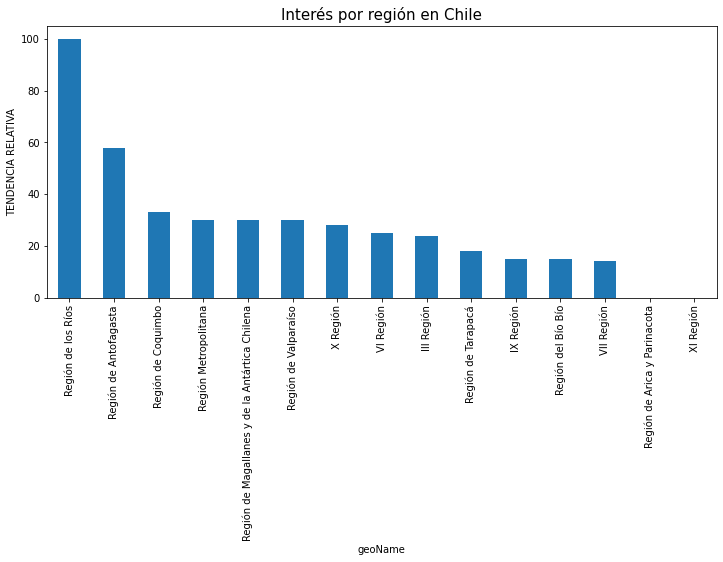

In [17]:
df.sort_values('pedidosya', ascending = False).plot(kind = 'bar', figsize = (12,5))
plt.ylabel('TENDENCIA RELATIVA')
plt.xticks(rotation = 90)
plt.legend().remove()
plt.title('Interés por región en Chile', fontsize = 15)
plt.show()

Si bien el interés a lo largo del tiempo es interesante, también podemos usa las tendencias de Google para encontrar temas, consultas o sugerencias relacionadas. Lo que nos ayudara a entender el contexto de las tendencias y a mejorar la búsqueda.

#### **Temas relacionados**
PyTrends también nos da la posibilidad de acceder a temas que se relacionan con nuestra palabra clave principal. En este caso, usando el método `pytrend.related_topics()` (el cual no requiere parámetros) podemos obtener un diccionario de datos de información relacionada. La estructura de este diccionario contiene una palabra clave y dos subclaves de temas relacionados:
* **top**: contiene los temas relacionados más populares,
* **rising**: contiene temas relacionados con el mayor aumento en la frecuencia de búsqueda desde el último período de tiempo.


In [18]:
# Temas relacionados a pedidosya
temas_relacionados = pytrend.related_topics()
print('Top')
print(temas_relacionados['pedidosya']['top'].drop(['formattedValue', 'link', 'topic_mid'], axis = 1))
print('Rising')
print(temas_relacionados['pedidosya']['rising'].drop(['link', 'topic_mid'], axis = 1))

Top
   value  hasData topic_title topic_type
0    100     True   PedidosYa   Compañía
1     10     True       Cupón       Tema
2      9     True      Rebate       Tema
3      7     True       Rappi   Compañía
Rising
   value formattedValue topic_title topic_type
0    170         +170 %      Rebate       Tema
1    130         +130 %       Cupón       Tema
2    100         +100 %       Rappi   Compañía


#### **Consultas relacionadas**
Al igual que con los temas relacionados, nos puede interesar explorar las consultas que están estrechamente relacionadas con nuestras palabras claves principales.
 Para ello nos podemos apoyar en el método `pytrend.related_queries()`, el cual nos entrega un diccionario que contiene una palabra clave y dos subclaves de consultas relacionadas:
* **top**: las consultas de búsqueda más populares,
* **rising**: consultas con el mayor aumento en la frecuencia de búsqueda desde el último período de tiempo.

In [19]:
# Consultas relacionadas a pedidosya
consultas_relacionadas = pytrend.related_queries()
print('Top')
print(consultas_relacionadas['pedidosya']['top'])
print('Rising')
print(consultas_relacionadas['pedidosya']['rising'])

Top
                     query  value
0  cupones pedidosya chile    100
Rising
                     query   value
0  cupones pedidosya chile  606650


#### **Sugerencias**

El método `pytrend.suggestions(keyword)` nos sugiere una lista de palabras clave adicionales que se pueden usar para refinar una búsqueda de tendencias.


In [20]:
# Sugerencia de palabras claves, adicionales.
sugerencias = pd.DataFrame(pytrend.suggestions('pedidosya')).drop('mid', axis = 1)
sugerencias.head()

,title,type
0,PedidosYa,Compañía
1,iFood,Empresa
2,Delivery Hero,Empresa
3,La Cabrera,"Restaurante argentino en Buenos Aires, Argentina"
4,Atrix,"Tienda outlet en Montevideo, Uruguay"


#### **Tendencias de búsquedas diarias**
Puede que nos interese conocer cuáles son las tendencias de búsquedas diarias. En este caso lo podemos hacer por país o a nivel mundial, apoyándonos en el método `pytrends.trending_searches()`.

In [21]:
# Tendencias de búsquedas diarias  en Chile
tendencia_chile = pytrend.trending_searches(pn='chile')
tendencia_chile.head()

,0
0,Flamengo U. Católica
1,Copa Libertadores
2,Metro de Santiago
3,Southampton Liverpool
4,Estado de excepción


#### **Tendencias de búsqueda en tiempo real**
Con el método `pytrend.realtime_trending_searches` podemos acceder a los datos que corresponden a las tendencias de búsqueda en tiempo real para un país o a nivel mundial.

In [22]:
# Tendencias de búsqueda en tiempo real 
tendencias_real_time = pytrend.realtime_trending_searches(pn = 'CL')
tendencias_real_time.head()

,title,entityNames
0,"Copa Sudamericana, Atlético Clube Goianiense, ...","[Copa Sudamericana, Atlético Clube Goianiense,..."
1,"Colo-Colo, Copa Libertadores, Club Deportivo U...","[Colo-Colo, Copa Libertadores, Club Deportivo ..."
2,"Copa Libertadores, Club Nacional de Football, ...","[Copa Libertadores, Club Nacional de Football,..."
3,"UEFA Europa League, Rangers F.C., Eintracht Fr...","[UEFA Europa League, Rangers F.C., Eintracht F..."
4,"Argentina, White, Racism","[Argentina, White, Racism]"


#### Estas son algunas de las maneras en las que podemos apoyarnos en la API PyTrends, para dar fuerza a nuestros proyectos de datos. Las aplicaciones son variadas y dependen de nuestros intereses particulares. Algunas otras aplicaciones que podrían útiles, son:
* Identificar nuevas palabras claves.
* Localizar tendencias estacionales para apoyar estrategias.
* Comparación de términos de búsquedas.
* Seguimiento de la competencia.
* Segmentación geográfica.
* Tendencias en los diferentes canales de Google.